
There are 4 questions, with points weighting given in the question. Write Python code to solve each question.

Points will be deducted for 

- Functions or classes without `docstrings`
- Grossly inefficient or redundant code
- Excessively verbose code
- Use of *magic* numbers

Partial credit may be given for incomplete or wrong answers but not if you do not attempt the question.

**IMPORTANT**

- This is an **open book** exam meant to evaluate fluency with linear algebra and optimization Python
- Use a stopwatch to record the time you took to complete the exam in the cell below **honestly**:
    - Under 2 hours - No penalty
    - Between 2-3 hours - 5 points penalty
    - More than 3 hours or **no time reported** - 10 points penalty
- Upload the notebook to Sakai when done

**Honor Code**: You agree to follow the Duke Honor code when taking this exam.

**Self-reported time taken**: It is your responsibility to time your exam.

<font color=red>Fill in total time in hours and minutes in the cell below</font>

1h 46min

**1**. (20 points)

In school, to help remember when the spelling should be "ei" or "ie", students are often taught the rule "i before e except after c". For example, "piece" and "conceive" fit this rule.

- Find all occurrences of words in the book `alice.txt` that violate this rule (10 points)
- Make a table of how often each such word occurs in decreasing order of the count (10 points)

In [11]:
import string
import re
import numpy as np
import pandas as pd

In [24]:
with open("alice.txt") as f:
    texts = f.read()

words = texts.strip().lower().translate(str.maketrans('-', ' ', string.punctuation)).split()
violate = []

for word in words:
    
    flag = False
    if "cie" in word:
        flag = True
    else:
        index = [m.start() for m in re.finditer('ei', word)]
        for idx in index:
            if idx == 0:
                flag = True
                break
            elif word[idx - 1] != 'c':
                flag = True
                break
    violate.append(flag)

occur = sum(violate)
print(occur)

33


In [31]:
word_violate = list(np.array(words)[np.array(violate)])
vocab = set(word_violate)
cnt = np.zeros(len(vocab), dtype = 'int')
for i, word in enumerate(vocab):
    cnt[i] = word_violate.count(word)

df = pd.DataFrame(cnt, columns=['occurence'], index=vocab)
df.sort_values(by = 'occurence', ascending = False)

,occurence
their,10
either,9
height,4
being,2
neither,2
ein,1
seeing,1
theirs,1
fireirons,1
fancied,1


**2**. (20 points)

A grayscale figure of a Mandelbrot set is loaded for you.

- Compress the figure by reconstructing a rank k version, where is k is the number of singular values > 1e-9 (5 points)
- Calculate the Frobenius norm of the difference between the original and reconstructed image (5 points)
- Calculate the number of bytes needed to store the original image and the data needed to reconstruct the rank k image (5 points)
- What is the dimension of the null space of the reconstructed rank k image? (5 points)

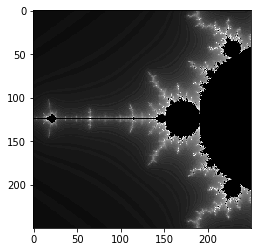

In [33]:
from skimage import color, io
import matplotlib.pyplot as plt
%matplotlib inline

img = color.rgb2gray(color.rgba2rgb(io.imread('mandelbrot-250x250.png')))
plt.imshow(img, cmap='gray')
pass

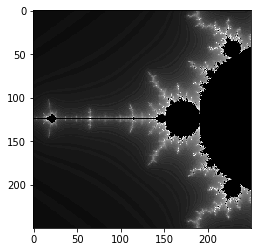

In [39]:
import scipy.linalg as la

U, s, Vt = la.svd(img, full_matrices = False)
k = np.sum(s > 1e-9)
img_new = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

plt.imshow(img_new, cmap='gray')
pass

In [42]:
la.norm(img - img_new)

1.593420591396584e-13

In [50]:
print(img.size * img.itemsize)
print(U[:, :k].size * U[:, :k].itemsize + s.size * s.itemsize + Vt[:k, :].size * Vt[:k, :].itemsize)

500000
550000


In [56]:
len(img_new) - np.linalg.matrix_rank(img_new)

113

**3**. (20 points)

Let the columns of $A$ represent the basis vectors for a plane  in $\mathbb{R}^3$

$$
A = \pmatrix{1 & 2\\2 & 3\\3 & 4}
$$

- Construct a matrix $P$ that projects a vector $v \in \mathbb{R}^3$ onto this plane (5 points)
- Find the vector on the plane that is closes to the vector $\pmatrix{3\\4\\6}$ (5 points)
- Let  $v = \pmatrix{3\\4\\6}$. Find the coordinates of $\text{proj}_A v$ with respect to the basis vectors of the plane (5 points)
- Find the distance between $\text{proj}_A v$ and $v$ using projection (5 points)

In [58]:
A = np.array([[1, 2], [2, 3], [3, 4]])

In [62]:
P = A @ la.inv(A.T @ A) @ A.T
P

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

In [67]:
v = np.array([3, 4, 6])
proj_v = P @ v
proj_v

array([2.83333333, 4.33333333, 5.83333333])

In [74]:
Q = np.eye(len(A)) - P
Q @ v

array([ 0.16666667, -0.33333333,  0.16666667])

**4** (30 points)

Given the function $f(x) = x^3 - 5x^2 + x + 1$,

- Perform a single quadratic interpolation starting with the points (0, 2, 5) and return the next bracket (10 points)
- Plot the function and the quadratic interpolation showing the interpolated points for $x \in (-1, 6)$ (5 points)
- Find a local minimum using the newton method starting at the point x=4 with a tolerance of $10^{-4}$ for $\delta x$. Return the value of $x$ and $f(x)$ at that point (10 points)
- Find all roots of the function using the companion matrix method (5 points)

For the optimization problems, stop when a tolerance of $10^{-4}$ is reached for $x$. Do not use any library functions from `scipy.optimize` or `scipy.interpolate` or `np.root` (you can use for checking but not for solving)

In [98]:
from scipy.interpolate import interp1d

def f(x):
    '''Definition of function f(x)'''
    
    return x**3 - 5*x**2 + x + 1

def f_qua_intp(x, x0, y0):
    '''Calculate the quadratic interpolation function'''
    
    s = 0.0
    for i in range(len(x0)):
        xi = np.delete(x0, i)
        s += y0[i] * np.prod(x - xi)/np.prod(x0[i] - xi)
    return s

x0 = np.array([0,2,5])
y0 = f(x0)
f2 = lambda x: f_qua_intp(x, x0, y0)

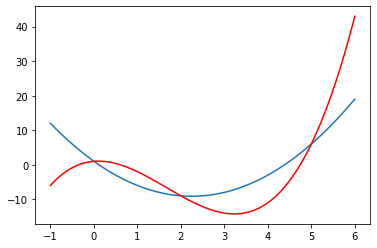

In [106]:
xs = np.linspace(-1, 6, num=10000, endpoint=True)
plt.plot(xs, [f2(x) for x in xs])
plt.plot(xs, f(xs),'red')
pass

In [109]:
def df(x):
    '''The derivative function of f(x)'''
    
    return 3*x**2 - 10*x + 1

def d2f(x):
    '''The second order derivative function of f(x)'''
    
    return 6*x - 10

x0 = 4
xval = x0
limit = 1e-4
notconv = True

while(notconv):
    funval = df(xval)
    nextval = xval - funval / d2f(xval)
    if abs(funval) < limit:
        notconv = False
    else:
        xval = nextval
    
print(xval)

3.2301458435204404


In [110]:
funval

6.807603273273344e-05

In [118]:
poly = np.array([1,-5,1,1])
A = np.r_[(-poly[1:] / poly[0])[None, :], np.c_[np.eye(2), np.zeros(2)[:, None]]]
A

array([[ 5., -1., -1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [119]:
la.eigvals(A)

array([ 4.74482608+0.j,  0.60406814+0.j, -0.34889422+0.j])